## Proposta do projeto

Este projeto tem como objetivo realizar uma análise preditiva utilizando aprendizado de máquina com base em dados de funcionários de uma organização, os dados serão: Idade, Rotatividade, Viagens a trabalho, Salário Diário, Departamento, Distância de casa, Escolaridade, Área de formação, Contagem de funcionários, Número do funcionário, Satisfação com ambiente de trabalho, Gênero, Sálario por hora, Envolvimento no trabalho, Nível do cargo, Função, Satisfação no trabalho, Estado civil, Renda mensal, Taxa mensal, Número de empresas anteriores, Maior de 18 anos, Faz hora extra, Aumento de salário (%), Avaliação de desempenho, Satisfação com relacionamento, Horas de trabalho padrão, Nível de opção de ações, Total de anos trabalhados, Treinamentos no último ano, Equílibro Vida-Trabalho, Anos na empresa, Anos no cargo atual, Ano desde última promoção, Anos com o Gestor Atual. 

A partir desses dados, será treinado um modelo de *machine learning* com o objetivo de prever a probabilidade de desligamento (rotatividade) de um colaborador.



## Porque utilizar esse modelo de aprendizado de máquina?

A utilização de um modelo de aprendizado de máquina para prever a rotatividade de funcionários possibilita à empresa agir de forma proativa na gestão de talentos, contribuindo diretamente para a redução de custos e melhoria nos processos internos de recursos humanos. Entre os principais benefícios, destacam-se:
* **Antecipação de desligamentos**: o modelo permite identificar colaboradores com maior probabilidade de saída, possibilitando que o RH planeje com antecedência ações corretivas ou preventivas;
* **Otimização de contratações**: com previsões mais precisas, é possível iniciar o processo seletivo de substituição antes mesmo do desligamento efetivo, evitando lacunas críticas;
* **Redução de custos com treinamentos**: evita-se o investimento em capacitação de colaboradores que estão prestes a sair da empresa;
* **Melhor alocação de pessoal**: funcionários com alta probabilidade de saída podem ser evitados em projetos de longo prazo ou estratégicos, minimizando o risco de atrasos ou retrabalho;
* **Apoio à tomada de decisão**: a análise baseada em dados fortalece a atuação do RH com evidências concretas, tornando a gestão de pessoas mais eficaz e baseada em métricas.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
len(df)

1470

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Boxplot, Histograma, Gráfico de violino do salário mensal dos colaboradores

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


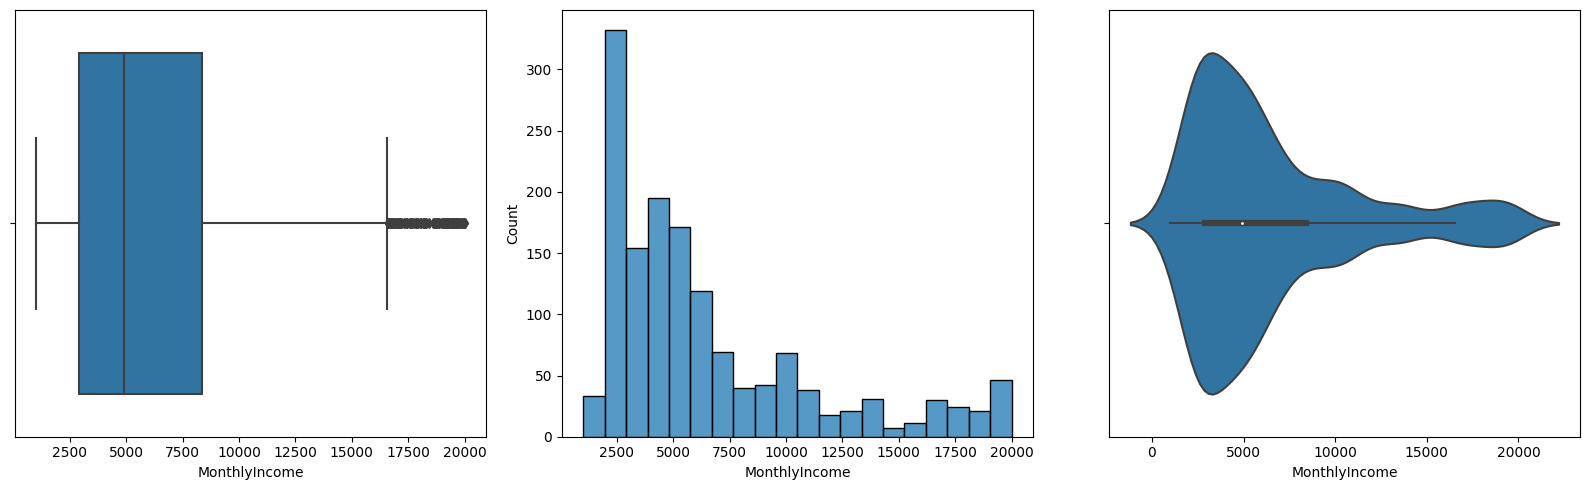

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 5))

sns.boxplot(df, x='MonthlyIncome', ax=axs[0])
sns.histplot(df, x='MonthlyIncome', ax=axs[1])
sns.violinplot(df, x='MonthlyIncome', ax=axs[2])

plt.tight_layout()
plt.show()

### Relação entre rotatividade e outros dados 

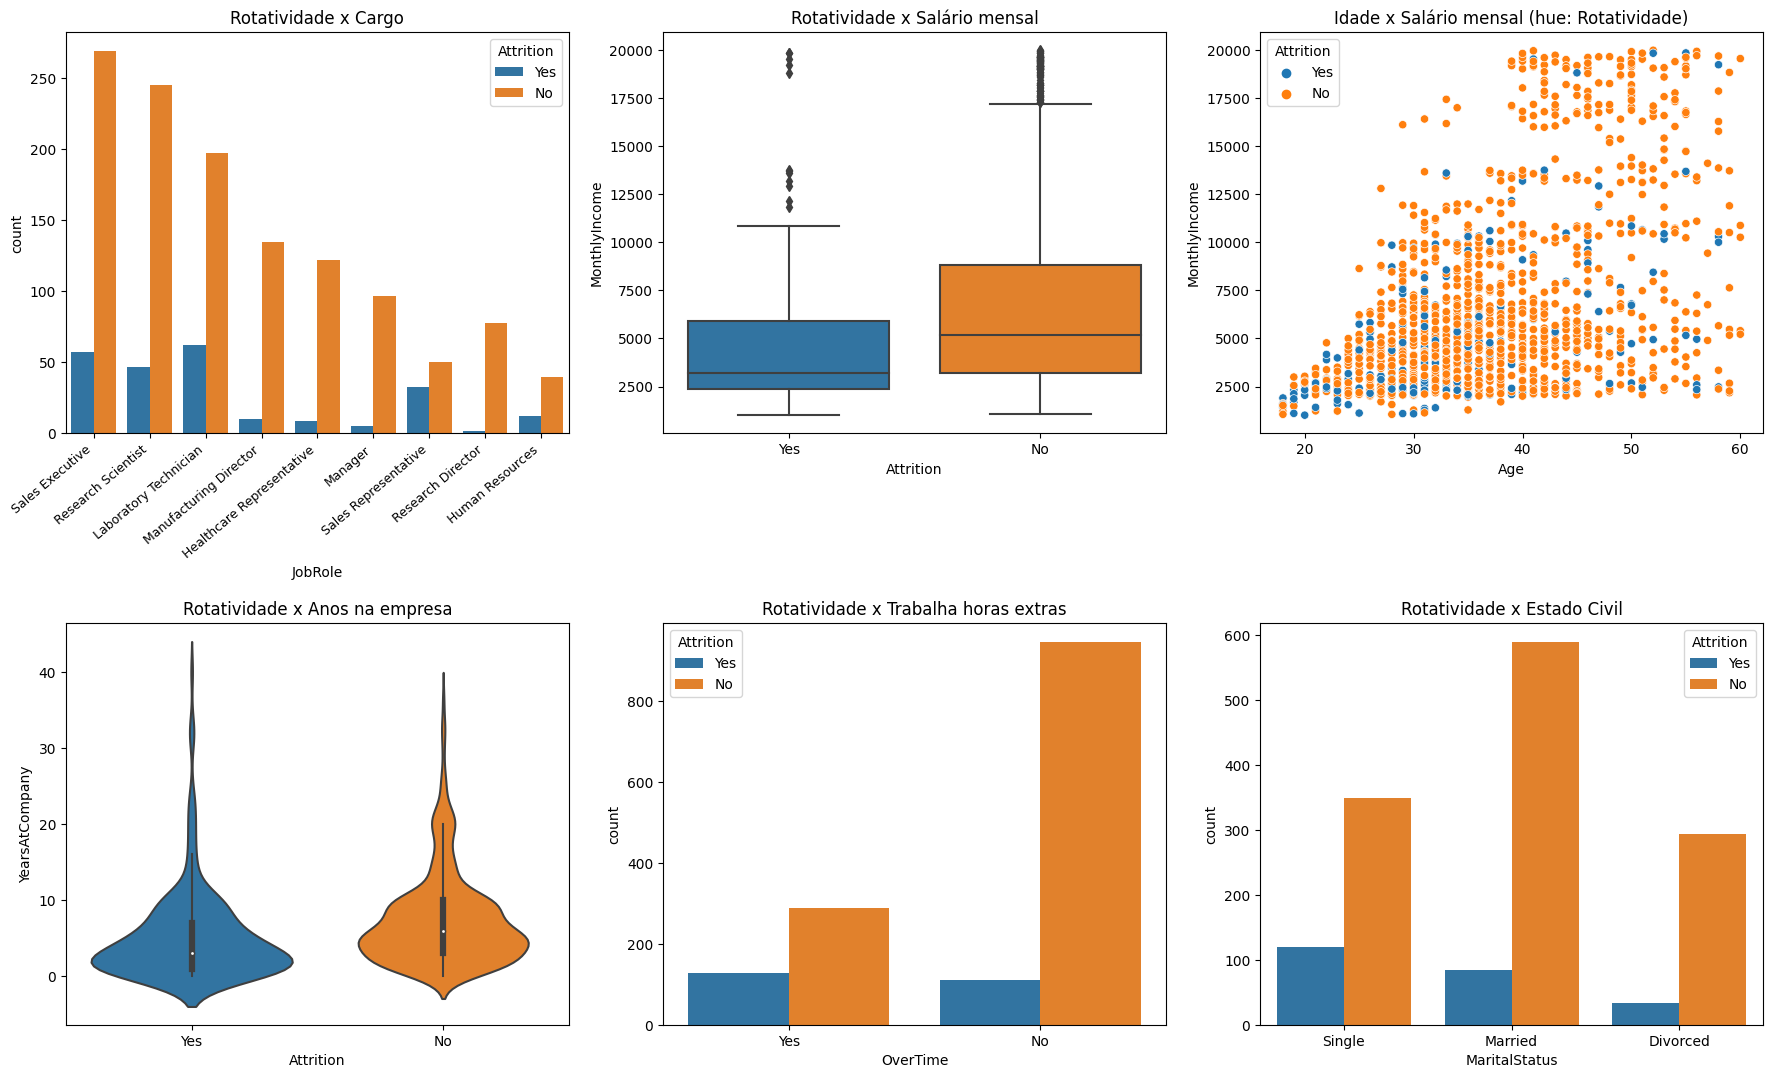

In [9]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18, 11))

sns.countplot(data=df, x='JobRole', hue='Attrition', ax=axs[0][0])
axs[0][0].set_title("Rotatividade x Cargo")
axs[0][0].set_xticklabels(axs[0][0].get_xticklabels(), rotation=40, ha='right')
axs[0][0].tick_params(axis='x', labelsize=9)

sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=axs[0][1])
axs[0][1].set_title("Rotatividade x Salário mensal")

sns.scatterplot(data=df, x='Age', y='MonthlyIncome', hue='Attrition', ax=axs[0][2])
axs[0][2].set_title("Idade x Salário mensal (hue: Rotatividade)")

sns.violinplot(data=df, x='Attrition', y='YearsAtCompany', ax=axs[1][0])
axs[1][0].set_title("Rotatividade x Anos na empresa")

sns.countplot(data=df, x='OverTime', hue='Attrition', ax=axs[1][1])
axs[1][1].set_title("Rotatividade x Trabalha horas extras")

sns.countplot(data=df, x='MaritalStatus', hue='Attrition', ax=axs[1][2])
axs[1][2].set_title("Rotatividade x Estado Civil")

plt.tight_layout(pad=1.5)       
plt.show()

### Insights que foram possíveis de se tirar dos gráficos:

**Rotatividade x Cargo**: Os cargos em que mais ocorrem *attrition* são: Executivo de vendas, Ciêntistas pesquisadores e Técnicos de laboratório, isso provavelmente ocorre pois também são os cargos que mais tem membros. Por outro lado os Representantes de Venda tem a maior quantidade de *attrition* sendo bastante disproporcional comparado.

**Rotatividade x Salário**: Os membros que mais aprensentam *attrition* são também os que apresentam: menores salário (Q1, Mediana/Q2, Q3).

**Idade x Salário (hue: Rotatividade)**: Quanto mais novo e quanto menor o salário mais suscetível uma pessoa esta de apresentar *attrition*, provavelmente porque elas podem se arriscar mais do que pessoas mais velhas.

**Rotatividade x Anos na empresa**: Apesar de ser apenas uma pequena diferença, quanto menos tempo na empresa mais suscetível de uma pessoa apresentar *attrition*.

**Rotatividade x Trabalhou horas extras**: Proporcionalmente os colaboradores da empresa que mais trabalham horas extras também são os que mais apresentam *attrition*.

**Rotatividade x Estado civil**: É possível notar que proporcionalmente as pessoas que são solteiras tem maiores tendências a sair da empresa, provavelmente porque elas percebem que podem tomar mais riscos na vida, o que não poderia acontecer caso fossem casadas.

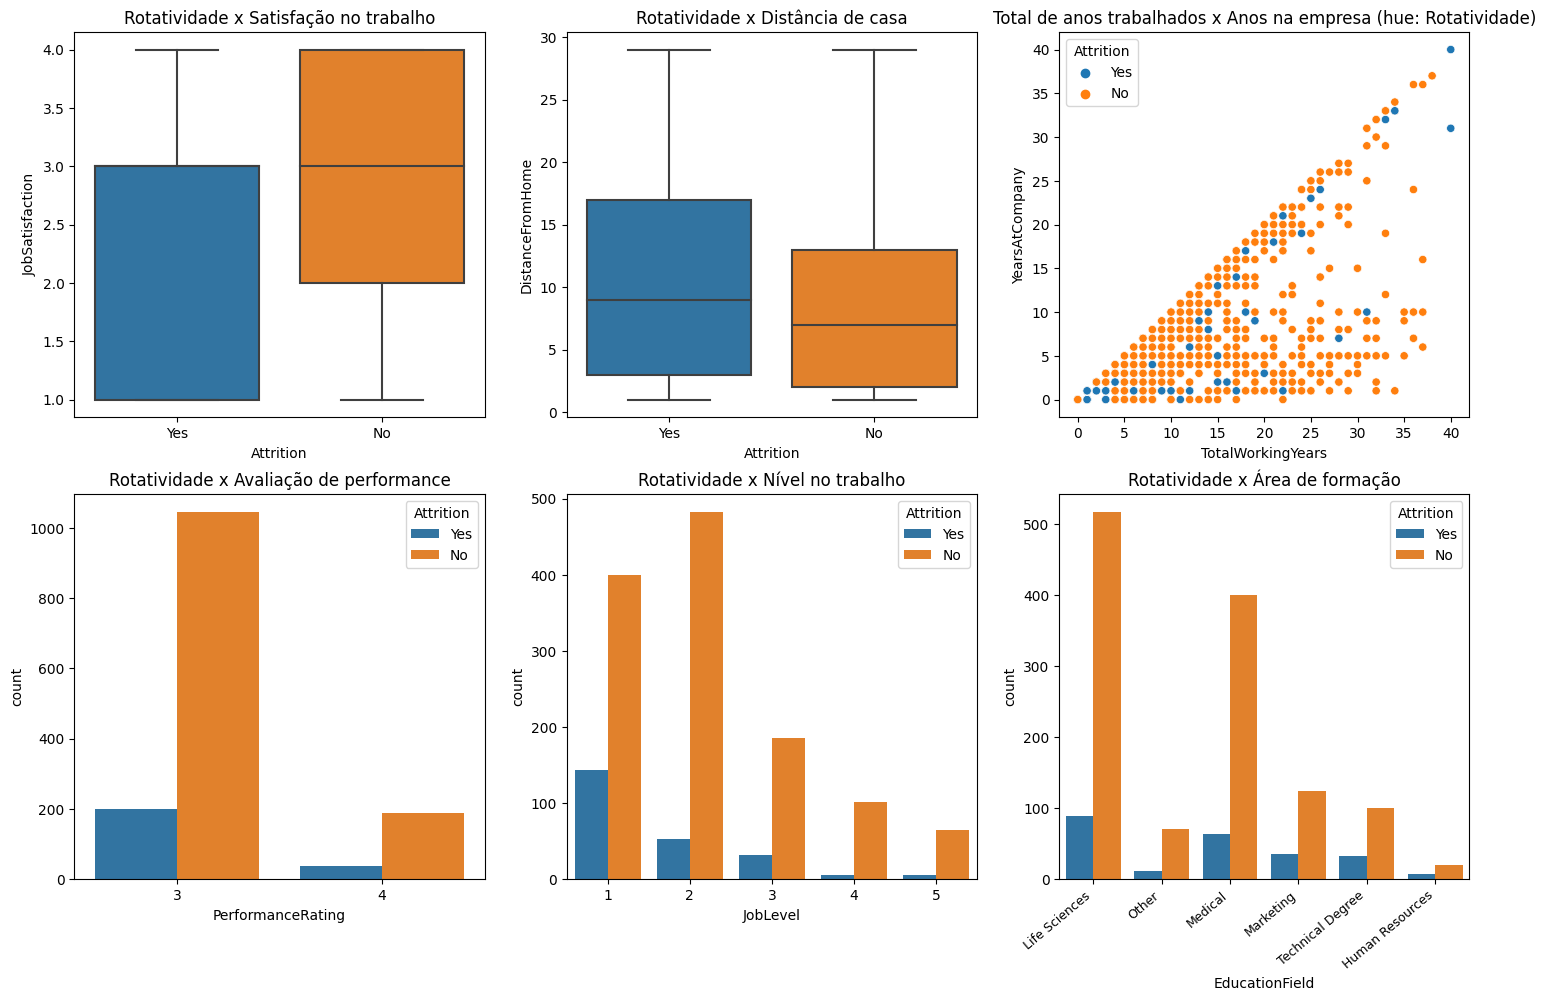

In [10]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18, 11))

sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', ax=axs[0][0])
axs[0][0].set_title("Rotatividade x Satisfação no trabalho")

sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', ax=axs[0][1])
axs[0][1].set_title("Rotatividade x Distância de casa")

sns.scatterplot(data=df, x='TotalWorkingYears', y='YearsAtCompany', hue='Attrition', ax=axs[0][2])
axs[0][2].set_title("Total de anos trabalhados x Anos na empresa (hue: Rotatividade)")

sns.countplot(data=df, x='PerformanceRating', hue='Attrition', ax=axs[1][0])
axs[1][0].set_title("Rotatividade x Avaliação de performance")

sns.countplot(data=df, x='JobLevel', hue='Attrition', ax=axs[1][1])
axs[1][1].set_title("Rotatividade x Nível no trabalho")

sns.countplot(data=df, x='EducationField', hue='Attrition', ax=axs[1][2])
axs[1][2].set_title("Rotatividade x Área de formação")
axs[1][2].set_xticklabels(axs[1][2].get_xticklabels(), rotation=40, ha='right')
axs[1][2].tick_params(axis='x', labelsize=9)


plt.show()

### Insights que foram possíveis de se tirar dos gráficos:

**Rotatividade x Satisfação no trabalho**: Quanto mais insatisfeitos com o trabalhos mais as pessoas tendem a sair da empresa e buscar outros empregos.

**Rotatividade x Distância de casa**: Apesar de pouca diferença, quanto maiores as distâncias entre emprego e casa, mais os colaboradores tendem a se desligar da empresa. 

**Total anos de trabalha x Anos na empresa (hue: Rotatividade)**: Existe uma maior confluência de pessoas saindo da empresa quando os anos totais de trabalho e os anos de trabalho na empresa são menores, com maior relação entre anos de trabalho na empresa e desligamentos.

**Rotatividade x Avaliação de performance**: Quanto menor a avaliação de performance do colaborador maior a quantidade de incidência de desligamentos, entretanto essas quantidades parecem ser percentualmente proporcionais.

**Rotatividade x Nível no trabalho**: Quanto menor o nível no trabalho (estágio, juniores) maior a quantidade de desligamentos, níveis mais altos apresentam bem menos quantidades de desligamentos.

**Rotatividade x Área de formação**: 


### Convertendo variáveis categóricas para numéricas

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Over18'] = le.fit_transform(df['Over18'])
df['OverTime'] = le.fit_transform(df['OverTime'])

<Axes: >

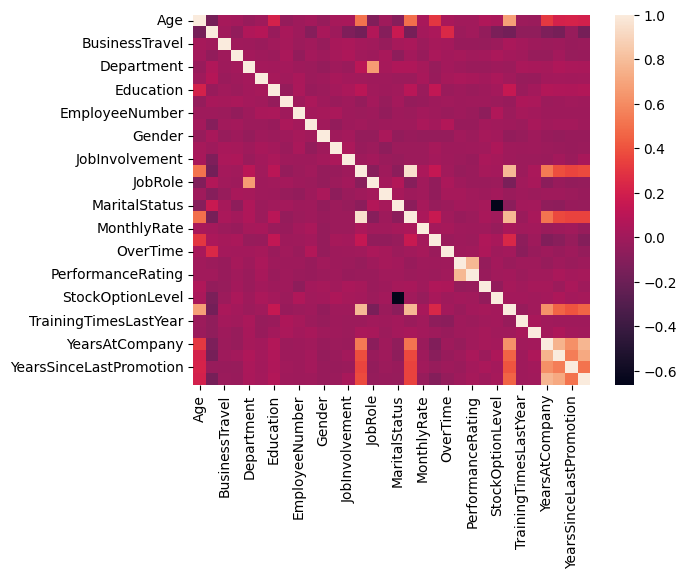

In [12]:
df2 = df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

sns.heatmap(df2.corr())